# Routing electrical

For routing low speed DC electrical ports you can use sharp corners instead of smooth bends.

You can also define `port.orientation = None` to ignore the port orientation for low speed DC ports.

## Single route functions

### get_route_electrical


Get route_electrical `bend = wire_corner` defaults to 90 degrees bend.

2022-04-29 12:46:47.407 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.3.4


pads: uid 1, ports [], aliases [], 0 polygons, 2 references


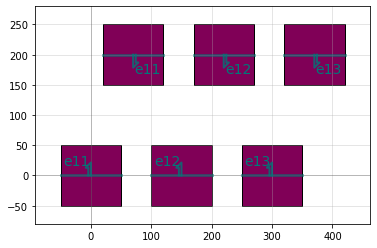

pads: uid 1, ports [], aliases [], 0 polygons, 2 references

In [1]:
import gdsfactory as gf

c = gf.Component("pads")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((70, 200))
c

pads_with_routes_with_bends: uid 6, ports [], aliases [], 0 polygons, 7 references


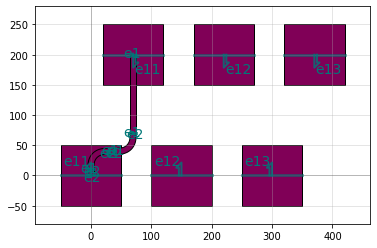

pads_with_routes_with_bends: uid 6, ports [], aliases [], 0 polygons, 7 references

In [2]:
c = gf.Component("pads_with_routes_with_bends")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((70, 200))
route = gf.routing.get_route_electrical(pt.ports["e11"], pb.ports["e11"], bend='bend_euler', radius=30)
c.add(route.references)
c

pads_with_routes_with_wire_corners: uid 14, ports [], aliases [], 0 polygons, 7 references


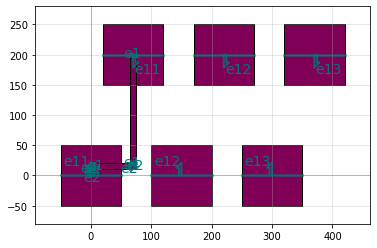

pads_with_routes_with_wire_corners: uid 14, ports [], aliases [], 0 polygons, 7 references

In [3]:
c = gf.Component("pads_with_routes_with_wire_corners")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((70, 200))
route = gf.routing.get_route_electrical(pt.ports["e11"], pb.ports["e11"], bend='wire_corner')
c.add(route.references)
c

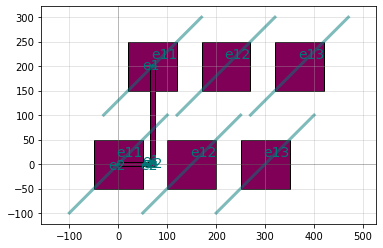

In [4]:
c = gf.Component("pads_with_routes_with_wire_corners_no_orientation")
pt = c << gf.components.pad_array(orientation=None, columns=3)
pb = c << gf.components.pad_array(orientation=None, columns=3)
pt.move((70, 200))
route = gf.routing.get_route_electrical(pt.ports["e11"], pb.ports["e11"], bend='wire_corner')
c.add(route.references)
c.plot()

### route_quad

pads_route_quad: uid 29, ports [], aliases [], 1 polygons, 2 references


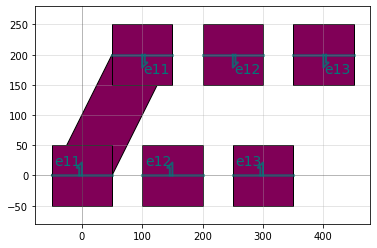

pads_route_quad: uid 29, ports [], aliases [], 1 polygons, 2 references

In [5]:
c = gf.Component("pads_route_quad")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))
route = gf.routing.route_quad(pt.ports["e11"], pb.ports["e11"], layer=(49, 0))
c.add(route)
c

### get_route_from_steps

pads_route_from_steps: uid 31, ports [], aliases [], 0 polygons, 5 references


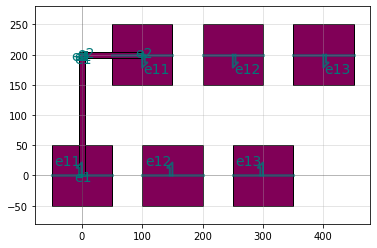

pads_route_from_steps: uid 31, ports [], aliases [], 0 polygons, 5 references

In [6]:
c = gf.Component("pads_route_from_steps")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))
route = gf.routing.get_route_from_steps(
    pb.ports["e11"],
    pt.ports["e11"],
    steps=[
        {"y": 200},
    ],
    cross_section=gf.cross_section.metal3,
    bend=gf.components.wire_corner,
)
c.add(route.references)
c

pads_route_from_steps_None_orientation: uid 36, ports [], aliases [], 0 polygons, 5 references


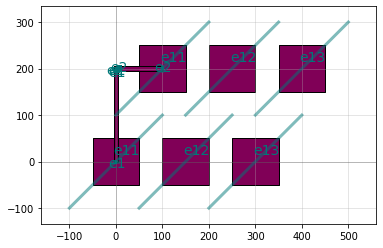

pads_route_from_steps_None_orientation: uid 36, ports [], aliases [], 0 polygons, 5 references

In [7]:
c = gf.Component("pads_route_from_steps_None_orientation")
pt = c << gf.components.pad_array(orientation=None, columns=3)
pb = c << gf.components.pad_array(orientation=None, columns=3)
pt.move((100, 200))
route = gf.routing.get_route_from_steps(
    pb.ports["e11"],
    pt.ports["e11"],
    steps=[
        {"y": 200},
    ],
    cross_section=gf.cross_section.metal3,
    bend=gf.components.wire_corner,
)
c.add(route.references)
c

## Bundle of routes (get_bundle_electrical)

pads_bundle: uid 37, ports [], aliases [], 0 polygons, 17 references


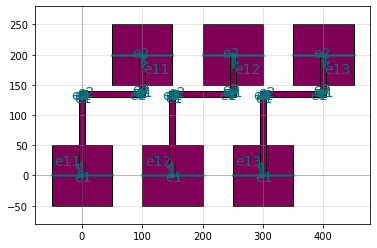

pads_bundle: uid 37, ports [], aliases [], 0 polygons, 17 references

In [8]:
import gdsfactory as gf

c = gf.Component("pads_bundle")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))

routes = gf.routing.get_bundle_electrical(
    pb.ports, pt.ports, end_straight_length=60, separation=30
)

for route in routes:
    c.add(route.references)
c

## get bundle from steps

pads_bundle_steps: uid 43, ports [], aliases [], 0 polygons, 17 references


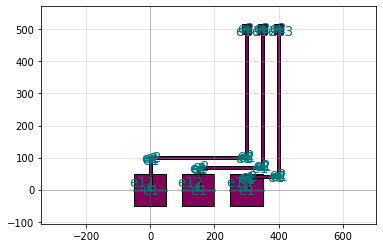

pads_bundle_steps: uid 43, ports [], aliases [], 0 polygons, 17 references

In [9]:
c = gf.Component("pads_bundle_steps")
pt = c << gf.components.pad_array(
    gf.partial(gf.components.pad, size=(30, 30)),
    orientation=270,
    columns=3,
    spacing=(50, 0),
)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((300, 500))

routes = gf.routing.get_bundle_from_steps_electrical(
    pb.ports, pt.ports, end_straight_length=60, separation=30, steps=[{"dy": 100}]
)

for route in routes:
    c.add(route.references)

c